In [2]:
#Import modules
import act
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import urllib3
import pandas as pd

In [3]:
#What are the possible crop types?
df = pd.read_csv('cdl_2022_stat_clip_20230609045923_1995493459.csv')
data = np.array(df['Category'])
data

array(['Corn', 'Cotton', 'Rice', 'Sorghum', 'Soybeans', 'Sunflowers',
       'Peanuts', 'Sweet Corn', 'Pop or Orn Corn', 'Mint', 'Barley',
       'Durum Wheat', 'Spring Wheat', 'Winter Wheat',
       'Dbl Crop WinWht/Soybeans', 'Rye', 'Oats', 'Millet', 'Canola',
       'Flaxseed', 'Safflower', 'Mustard', 'Alfalfa',
       'Other Hay/Non Alfalfa', 'Buckwheat', 'Sugarbeets', 'Dry Beans',
       'Potatoes', 'Other Crops', 'Sugarcane', 'Sweet Potatoes',
       'Misc Vegs & Fruits', 'Watermelons', 'Onions', 'Cucumbers',
       'Chick Peas', 'Lentils', 'Peas', 'Herbs', 'Clover/Wildflowers',
       'Sod/Grass Seed', 'Switchgrass', 'Fallow/Idle Cropland', 'Peaches',
       'Apples', 'Grapes', 'Christmas Trees', 'Citrus', 'Pecans',
       'Walnuts', 'Aquaculture', 'Open Water', 'Developed/Open Space',
       'Developed/Low Intensity', 'Developed/Medium Intensity',
       'Developed/High Intensity', 'Barren', 'Deciduous Forest',
       'Evergreen Forest', 'Mixed Forest', 'Shrubland', 'Grass/Past

In [6]:
# Set your ARM Live data username and password.
username = 'username'
token = 'token'

# Set the datastream and dates for download.  Let's just look at one week to start
# If you don't know the datastream you can always download through data discovery as well
# https://adc.arm.gov/discovery/#/
# You can also easily change the facility (E14) to other ones as well
datastream = 'sgp30qcecorE14.s1'
startdate = '20180501'
enddate = '20180505'

# Download data using the webservice
qcecor_files = act.discovery.download_data(username, token, datastream, startdate, enddate)

# Download ECOR data using the webservice
datastream = 'sgp30ecorE14.b1'
ecor_files = act.discovery.download_data(username, token, datastream, startdate, enddate)

[DOWNLOADING] sgp30qcecorE14.s1.20180501.000000.nc
[DOWNLOADING] sgp30qcecorE14.s1.20180502.000000.nc
[DOWNLOADING] sgp30qcecorE14.s1.20180503.000000.nc
[DOWNLOADING] sgp30qcecorE14.s1.20180504.000000.nc
[DOWNLOADING] sgp30qcecorE14.s1.20180505.000000.nc

If you use these data to prepare a publication, please cite:

Xie, S. Quality Controlled Eddy Correlation Flux Measurement (30QCECOR).
Atmospheric Radiation Measurement (ARM) User Facility.
https://doi.org/10.5439/1097546

[DOWNLOADING] sgp30ecorE14.b1.20180502.000000.cdf
[DOWNLOADING] sgp30ecorE14.b1.20180503.000000.cdf
[DOWNLOADING] sgp30ecorE14.b1.20180504.000000.cdf
[DOWNLOADING] sgp30ecorE14.b1.20180501.000000.cdf
[DOWNLOADING] sgp30ecorE14.b1.20180505.000000.cdf

If you use these data to prepare a publication, please cite:

Sullivan, R., Billesbach, D., Keeler, E., & Ermold, B. Eddy Correlation Flux
Measurement System (30ECOR). Atmospheric Radiation Measurement (ARM) User
Facility. https://doi.org/10.5439/1025039



In [7]:
# Reading in data to an xarray dataset is very easy using ACT
# ARM has some standards that can cause issues with the xarray reader at times
ds = act.io.armfiles.read_netcdf(qcecor_files)
ds_ecor = act.io.armfiles.read_netcdf(ecor_files)
ds_ecor

C:\Users\nickm\miniconda3\envs\nmarkus\Lib\site-packages\xarray\backends\plugins.py:71: RuntimeWarning: Engine 'cfgrib' loading failed:
Cannot find the ecCodes library
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)


<xarray.Dataset>
Dimensions:           (time: 240)
Coordinates:
  * time              (time) datetime64[ns] 2018-05-01 ... 2018-05-05T23:30:00
Data variables: (12/145)
    base_time         (time) datetime64[ns] 2018-05-01 2018-05-01 ... 2018-05-05
    time_offset       (time) datetime64[ns] 2018-05-01 ... 2018-05-05T23:30:00
    mean_u            (time) float32 dask.array<chunksize=(48,), meta=np.ndarray>
    qc_mean_u         (time) int32 dask.array<chunksize=(48,), meta=np.ndarray>
    mean_v            (time) float32 dask.array<chunksize=(48,), meta=np.ndarray>
    qc_mean_v         (time) int32 dask.array<chunksize=(48,), meta=np.ndarray>
    ...                ...
    n_bad_irga        (time) float32 dask.array<chunksize=(48,), meta=np.ndarray>
    n_bad_irga_light  (time) float32 dask.array<chunksize=(48,), meta=np.ndarray>
    mean_cooler       (time) float32 dask.array<chunksize=(48,), meta=np.ndarray>
    lat               (time) float32 36.61 36.61 36.61 ... 36.61 36.61 36.61
    lon               (time) float32 -97.49 -97.49 -97.49 ... -97.49 -97.49
    alt               (time) float32 315.0 315.0 315.0 ... 315.0 315.0 315.0
Attributes: (12/44)
    command_line:              ecor_ingest -s sgp -f E14
    process_version:           ingest-ecor-13.4-0.el6
    dod_version:               30ecor-b1-2.2
    input_source:              /data/collection/sgp/sgpecorE14.00/2018_0501_0...
    site_id:                   sgp
    platform_id:               30ecor
    ...                        ...
    ingest_software:           ingest-ecor-13.4-0.el6
    history:                   created by user dsmgr on machine ruby at 2018-...
    _file_dates:               ['20180501', '20180502', '20180503', '20180504...
    _file_times:               ['000000', '000000', '000000', '000000', '0000...
    _datastream:               sgp30ecorE14.b1
    _arm_standards_flag:       1

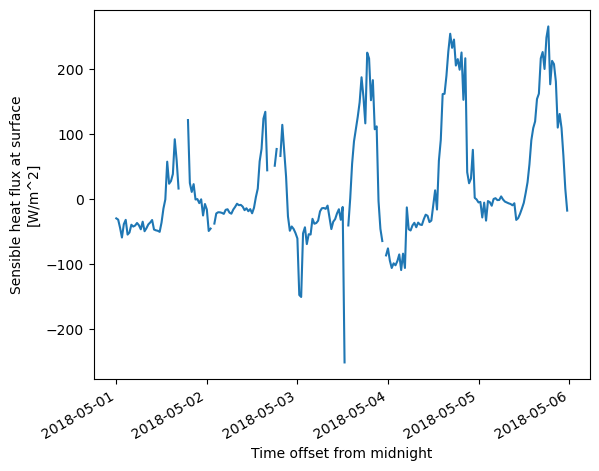

In [18]:
# We can use xarray funcationality to quickly plot up the data
ds['sensible_heat_flux'].plot()

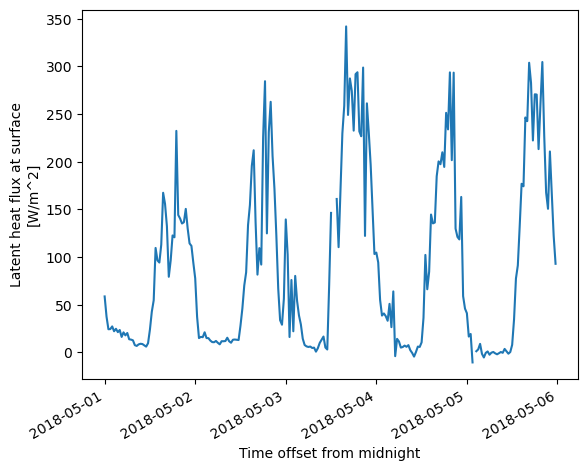

In [19]:
ds['latent_heat_flux'].plot()

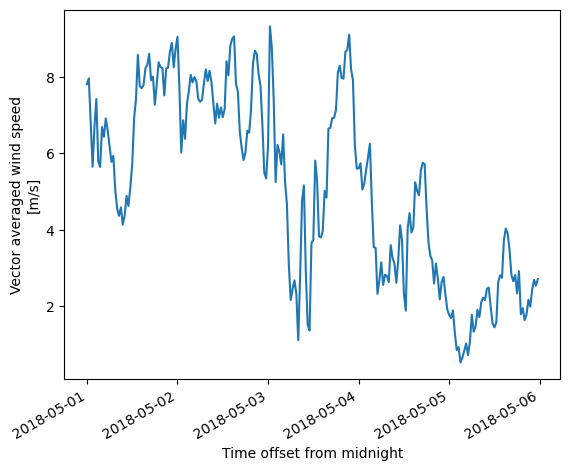

In [20]:
# Let's just make sure the wind data looks good as well
ds['wind_spd'].plot()

In [8]:
# First, let's build a function that has the "Good" fetch directions defined
def get_arm_fetch(site, fac):
    """
    Each SGP ECOR site has specific directions where the fetch is good
    These ranges list are of good fetch directions
    """
    ranges=[]
    if site == 'sgp':
        if fac == 'E1':  #ECOR
            ranges = [[0, 53], [120, 360]]
        if fac == 'E2':  # EBBR
            ranges = [[71, 137], [223, 289]]
        if fac == 'E3':  #ECOR
            ranges = [[0, 48], [132, 260]]
        if fac == 'E4':  # EBBR
            ranges = [[0, 158], [202, 360]]
        if fac == 'E5':  #ECOR
            ranges = [[80, 154], [154, 260]]
        if fac == 'E6':  #ECOR
            ranges = [[0, 360]]
        if fac == 'E7':  # EBBR
            ranges = [[0, 244], [296, 360]]
        if fac == 'E8':  # EBBR
            ranges = [[0, 224], [314, 360]]
        if fac == 'E9':  # EBBR
            ranges = [[0, 360]]
        if fac == 'E10':  #ECOR
            ranges = [[0, 360]]
        if fac == 'E11':  # EBBR
            ranges = [[0, 360]]
        if fac == 'E12':  # EBBR
            ranges = [[0, 360]]
        if fac == 'E13':  # EBBR
            ranges = [[0, 52], [142, 194], [328, 360]]
        if fac == 'E14':  #ECOR
            ranges = [[129, 265], [352, 360], [0, 85]]
        if fac == 'E15':  # EBBR
            ranges = [[133, 360]]
        if fac == 'E16':  #ECOR
            ranges = [[134, 269], [334, 360]]
        if fac == 'E18':  # EBBR
            ranges = [[138, 325]]
        if fac == 'E19':  # EBBR
            ranges = [[0, 133], [151, 360]]
        if fac == 'E20':  # EBBR
            ranges = [[0, 230], [310, 360]]
        if fac == 'E21':  #ECOR
            ranges = [[30, 360]]
        if fac == 'E22':  # EBBR
            ranges = [[0, 49], [139, 360]]
        if fac == 'E24':  #ECOR
            ranges = [[80, 280]]
        if fac == 'E25':  # EBBR
            ranges = [[30, 360]]
        if fac == 'E26':  # EBBR
            ranges = [[0, 33], [243, 360]]
        if fac == 'E27':  # EBBR
            ranges = [[20,156]]
        if fac == 'E31':  #ECOR
            ranges = [[100, 200], [30, 80]]
        if fac == 'E32':  # EBBR
            ranges = [[0,360]]
        if fac == 'E33':  #ECOR
            ranges = [[100, 300], [40, 80]]
        if fac == 'E34':  # EBBR
            ranges = [[0,360]]
        if fac == 'E35':  # EBBR
            ranges = [[0,360]]
        if fac == 'E36':  # EBBR
            ranges = [[0,360]]
        if fac == 'E37':  #ECOR
            ranges = [[135, 260], [280, 310]]
        if fac == 'E38':  #ECOR
            ranges = [[150, 260]]
        if fac == 'E39':  #ECOR
            ranges = [[100, 260], [280, 360], [0, 80]]
        if fac == 'E40':  # EBBR
            ranges = [[0,360]]
        if fac == 'E41':  #ECOR
            ranges = [[100, 260], [280, 360], [0, 80]]

    return ranges

In [9]:
#Bring variables from the ECOR dataset to the QC dataset
ds['wind_dir'] = ds_ecor['wind_dir']
ds['wind_spd'] = ds_ecor['wind_spd']
ds['ustar'] = ds_ecor['qc_ustar']
ds['wq'] = ds_ecor['cvar_wq']
ds['uw'] = ds_ecor['cvar_uw']

In [10]:
#Get variables in the proper format
wspd = ds['wind_spd'].values
wdir = ds['wind_dir'].values
ustar = ds['ustar'].values
lv = ds['latent_heat_flux'].values
h = ds['sensible_heat_flux'].values
lat = ds['lat'].values
lon = ds['lon'].values
time = ds['time'].values
year = time.astype('datetime64[Y]').astype(int) + 1970

In [11]:
urllib3.disable_warnings()

# Get good fetch ranges for this site
site = ds.attrs['site_id']
fac = ds.attrs['facility_id']
ranges = get_arm_fetch(site, fac)
#Get the crop types
crop = []
for i, d in enumerate(wdir):
    lat2, lon2 = act.utils.geo_utils.destination_azimuth_distance(lat[0], lon[0], d, 100.)
    if np.isnan(lat2) or np.isnan(lon2):
        crop.append(np.nan)
    else:
        crop.append(act.discovery.get_cropscape.croptype(lat2, lon2, year[i]))
    print(crop[i])
    print(wdir[i])
    print(h[i])
    print(lv[i])
    print(time[i])
    print()

Winter Wheat
174.2
-29.856256
58.710953
2018-05-01T00:00:00.000000000

Winter Wheat
167.2
-31.772675
37.503757
2018-05-01T00:30:00.000000000

Grass/Pasture
160.2
-44.256397
24.297915
2018-05-01T01:00:00.000000000

Winter Wheat
160.9
-59.356293
24.460396
2018-05-01T01:30:00.000000000

Winter Wheat
167.9
-38.84463
27.268131
2018-05-01T02:00:00.000000000

Winter Wheat
163.0
-32.137985
22.184696
2018-05-01T02:30:00.000000000

Grass/Pasture
150.7
-54.89034
24.775436
2018-05-01T03:00:00.000000000

Grass/Pasture
141.8
-51.65263
21.259434
2018-05-01T03:30:00.000000000

Grass/Pasture
155.1
-39.678013
23.49559
2018-05-01T04:00:00.000000000

Winter Wheat
172.4
-42.48131
16.232143
2018-05-01T04:30:00.000000000

Winter Wheat
170.2
-40.893074
21.013487
2018-05-01T05:00:00.000000000

Winter Wheat
177.1
-36.957134
17.88503
2018-05-01T05:30:00.000000000

Winter Wheat
178.5
-40.47195
20.344461
2018-05-01T06:00:00.000000000

Winter Wheat
178.7
-46.711178
13.797813
2018-05-01T06:30:00.000000000

Winter Wh

In [12]:
#Create an array for the crop types in the dataset
da = xr.DataArray(data=crop, dims=ds['wind_dir'].dims, name='crop_type')
ds['crop_type'] = da
da

<xarray.DataArray 'crop_type' (time: 240)>
array(['Winter Wheat', 'Winter Wheat', 'Grass/Pasture', 'Winter Wheat',
       'Winter Wheat', 'Winter Wheat', 'Grass/Pasture', 'Grass/Pasture',
       'Grass/Pasture', 'Winter Wheat', 'Winter Wheat', 'Winter Wheat',
       'Winter Wheat', 'Winter Wheat', 'Winter Wheat', 'Winter Wheat',
       'Winter Wheat', 'Grass/Pasture', 'Grass/Pasture', 'Grass/Pasture',
       'Winter Wheat', 'Winter Wheat', 'Grass/Pasture', 'Winter Wheat',
       'Winter Wheat', 'Winter Wheat', 'Winter Wheat', 'Winter Wheat',
       'Winter Wheat', 'Winter Wheat', 'Winter Wheat', 'Winter Wheat',
       'Winter Wheat', 'Winter Wheat', 'Winter Wheat', 'Winter Wheat',
       'Winter Wheat', 'Winter Wheat', 'Winter Wheat', 'Winter Wheat',
       'Winter Wheat', 'Winter Wheat', 'Winter Wheat', 'Winter Wheat',
       'Winter Wheat', 'Winter Wheat', 'Winter Wheat', 'Winter Wheat',
       'Winter Wheat', 'Winter Wheat', 'Winter Wheat', 'Winter Wheat',
       'Winter Wheat', 'Winter Wheat', 'Winter Wheat', 'Winter Wheat',
       'Winter Wheat', 'Winter Wheat', 'Winter Wheat', 'Winter Wheat',
       'Winter Wheat', 'Winter Wheat', 'Winter Wheat', 'Winter Wheat',
       'Winter Wheat', 'Winter Wheat', 'Winter Wheat', 'Winter Wheat',
       'Winter Wheat', 'Winter Wheat', 'Winter Wheat', 'Winter Wheat',
       'Winter Wheat', 'Winter Wheat', 'Winter Wheat', 'Winter Wheat',
       'Winter Wheat', 'Winter Wheat', 'Winter Wheat', 'Winter Wheat',
...
       'Developed/Open Space', 'Developed/Open Space',
       'Developed/Open Space', 'Developed/Open Space',
       'Developed/Open Space', 'Developed/Open Space',
       'Developed/Open Space', 'Developed/Open Space',
       'Developed/Low Intensity', 'Developed/Low Intensity',
       'Developed/Open Space', 'Developed/Open Space',
       'Developed/Open Space', 'Developed/Open Space',
       'Developed/Open Space', 'Developed/Open Space',
       'Developed/Open Space', 'Developed/Open Space',
       'Developed/Open Space', 'Developed/Open Space',
       'Developed/Open Space', 'Developed/Open Space',
       'Developed/Open Space', 'Alfalfa', 'Alfalfa', 'Alfalfa',
       'Developed/Open Space', 'Alfalfa', 'Alfalfa', 'Alfalfa', 'Alfalfa',
       'Alfalfa', 'Alfalfa', 'Alfalfa', 'Alfalfa', 'Alfalfa', 'Alfalfa',
       'Alfalfa', 'Alfalfa', 'Alfalfa', 'Alfalfa', 'Alfalfa', 'Alfalfa',
       'Alfalfa', 'Alfalfa', 'Alfalfa', 'Alfalfa', 'Alfalfa', 'Alfalfa',
       'Alfalfa', 'Alfalfa', 'Alfalfa', 'Alfalfa', 'Alfalfa', 'Alfalfa',
       'Alfalfa', None, 'Alfalfa', None, 'Alfalfa', 'Alfalfa', 'Alfalfa',
       'Alfalfa', 'Winter Wheat', 'Winter Wheat', 'Winter Wheat',
       'Winter Wheat'], dtype=object)
Dimensions without coordinates: time

In [14]:
#What crop types are we working with?
list = []
for j in range(0, 89):
    if data[j] in da:
        list.append(data[j])
list

['Winter Wheat',
 'Alfalfa',
 'Developed/Open Space',
 'Developed/Low Intensity',
 'Grass/Pasture']

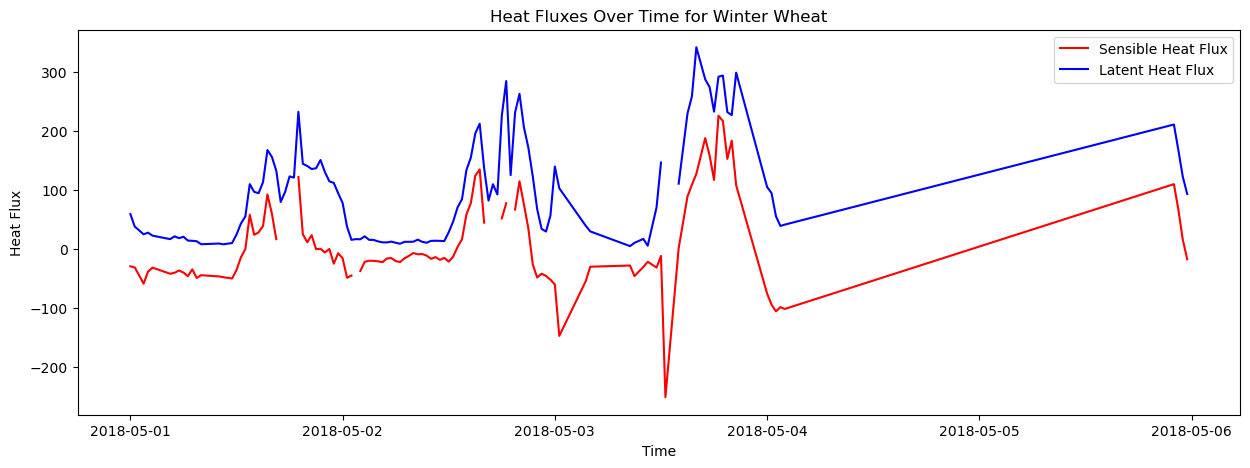

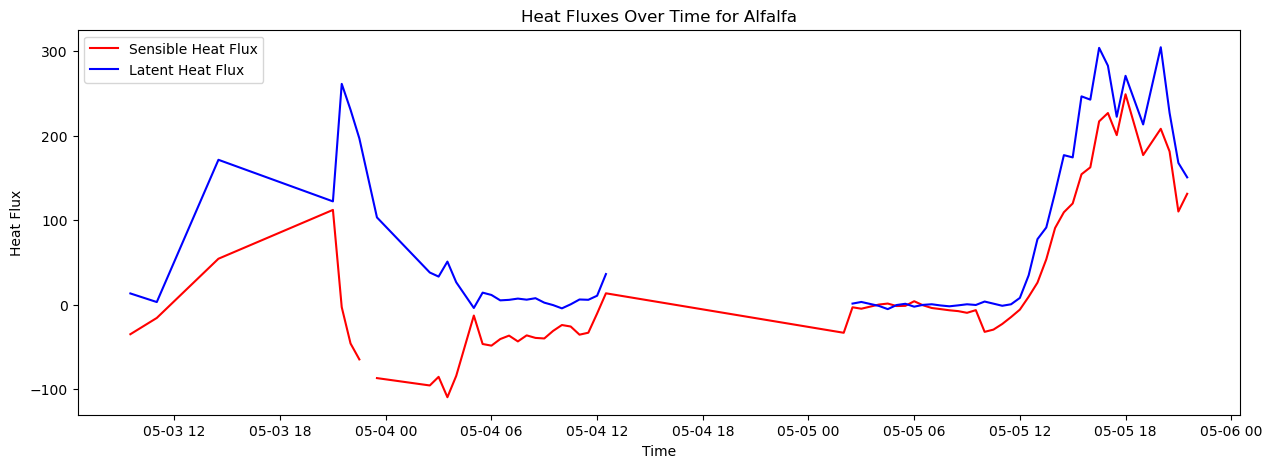

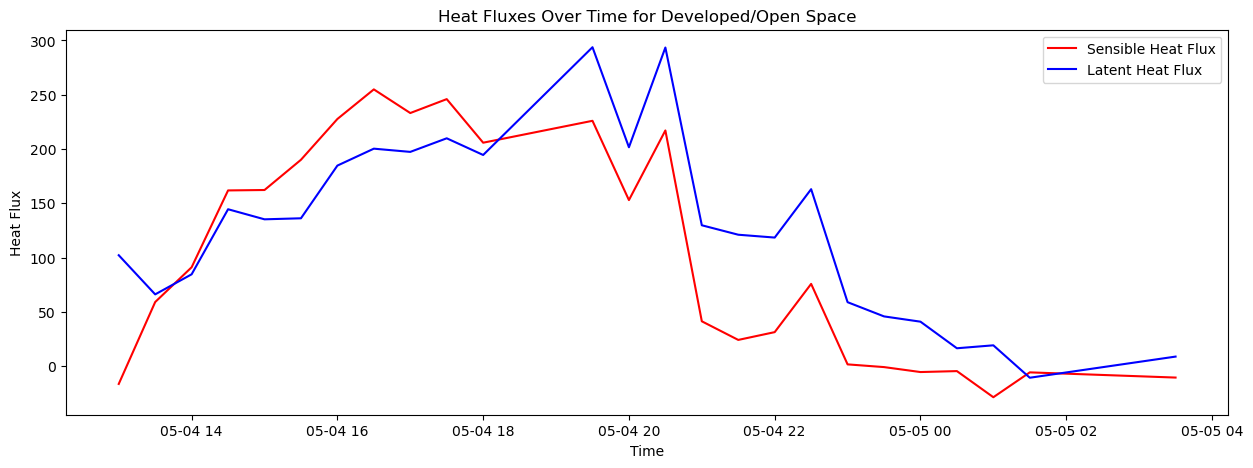

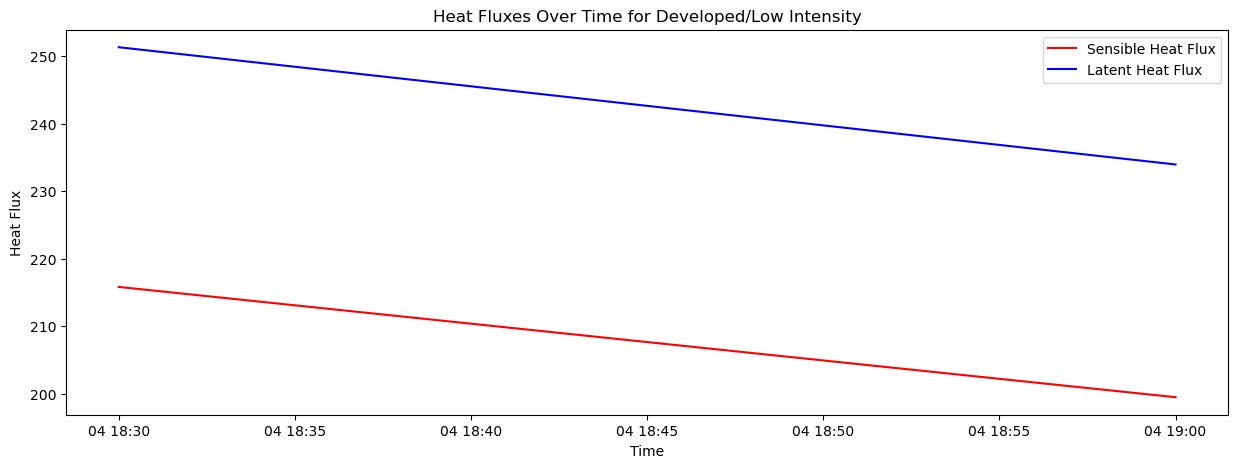

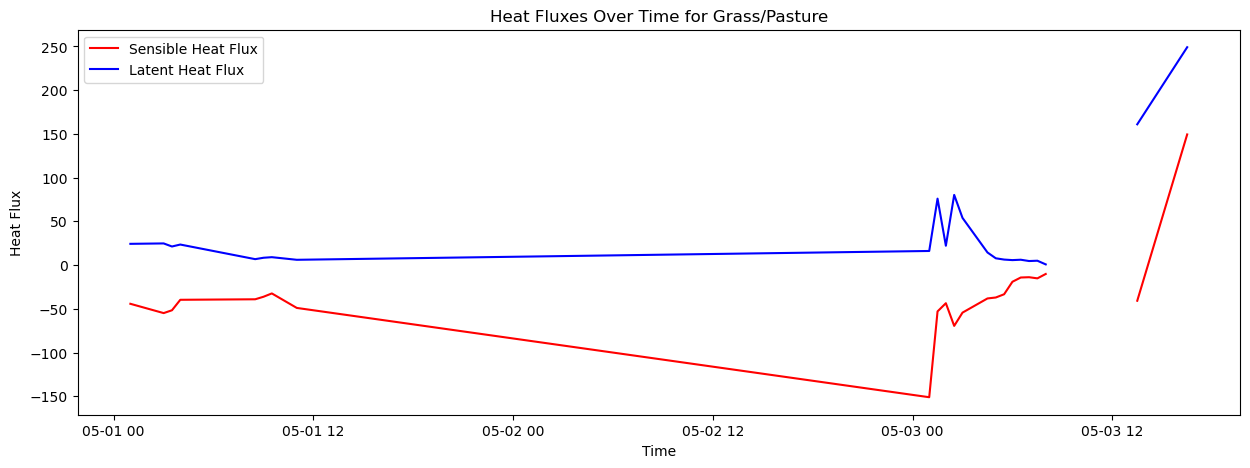

In [15]:
#Flux-Time Graphs
for x in range(0, len(list)):     
    y = np.where(da == list[x])
    plt.figure(figsize=(15, 5))
    ax = plt.subplot(111)
    ax.plot(time[y], h[y], color = 'red', label = 'Sensible Heat Flux')
    ax.plot(time[y], lv[y], color = 'blue', label = 'Latent Heat Flux')
    ax.set_xlabel('Time')
    ax.set_ylabel('Heat Flux')
    ax.set_title(f"Heat Fluxes Over Time for {list[x]}")
    ax.legend()

C:\Users\nickm\miniconda3\envs\nmarkus\Lib\site-packages\act\plotting\windrosedisplay.py:424: RuntimeWarning: Mean of empty slice
  mean_data[i, j] = np.nanmean(data[idx])
C:\Users\nickm\miniconda3\envs\nmarkus\Lib\site-packages\act\plotting\windrosedisplay.py:424: RuntimeWarning: Mean of empty slice
  mean_data[i, j] = np.nanmean(data[idx])
C:\Users\nickm\miniconda3\envs\nmarkus\Lib\site-packages\act\plotting\windrosedisplay.py:424: RuntimeWarning: Mean of empty slice
  mean_data[i, j] = np.nanmean(data[idx])
C:\Users\nickm\miniconda3\envs\nmarkus\Lib\site-packages\act\plotting\windrosedisplay.py:424: RuntimeWarning: Mean of empty slice
  mean_data[i, j] = np.nanmean(data[idx])
C:\Users\nickm\miniconda3\envs\nmarkus\Lib\site-packages\act\plotting\windrosedisplay.py:424: RuntimeWarning: Mean of empty slice
  mean_data[i, j] = np.nanmean(data[idx])
C:\Users\nickm\miniconda3\envs\nmarkus\Lib\site-packages\act\plotting\windrosedisplay.py:424: RuntimeWarning: Mean of empty slice
  mean_dat

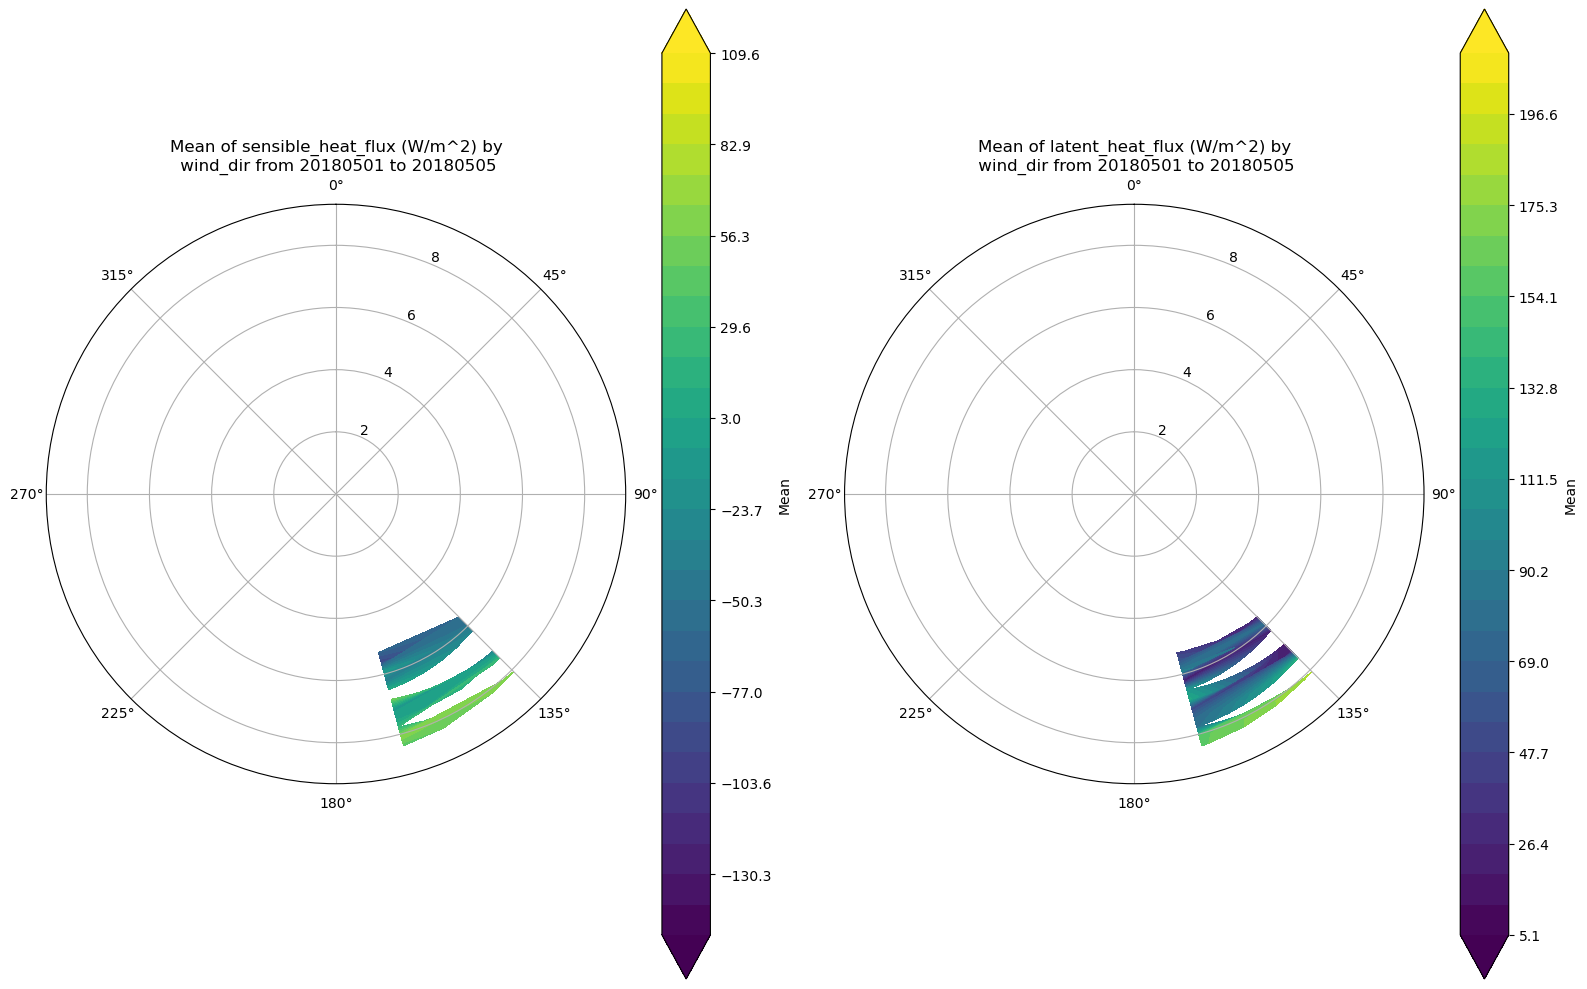

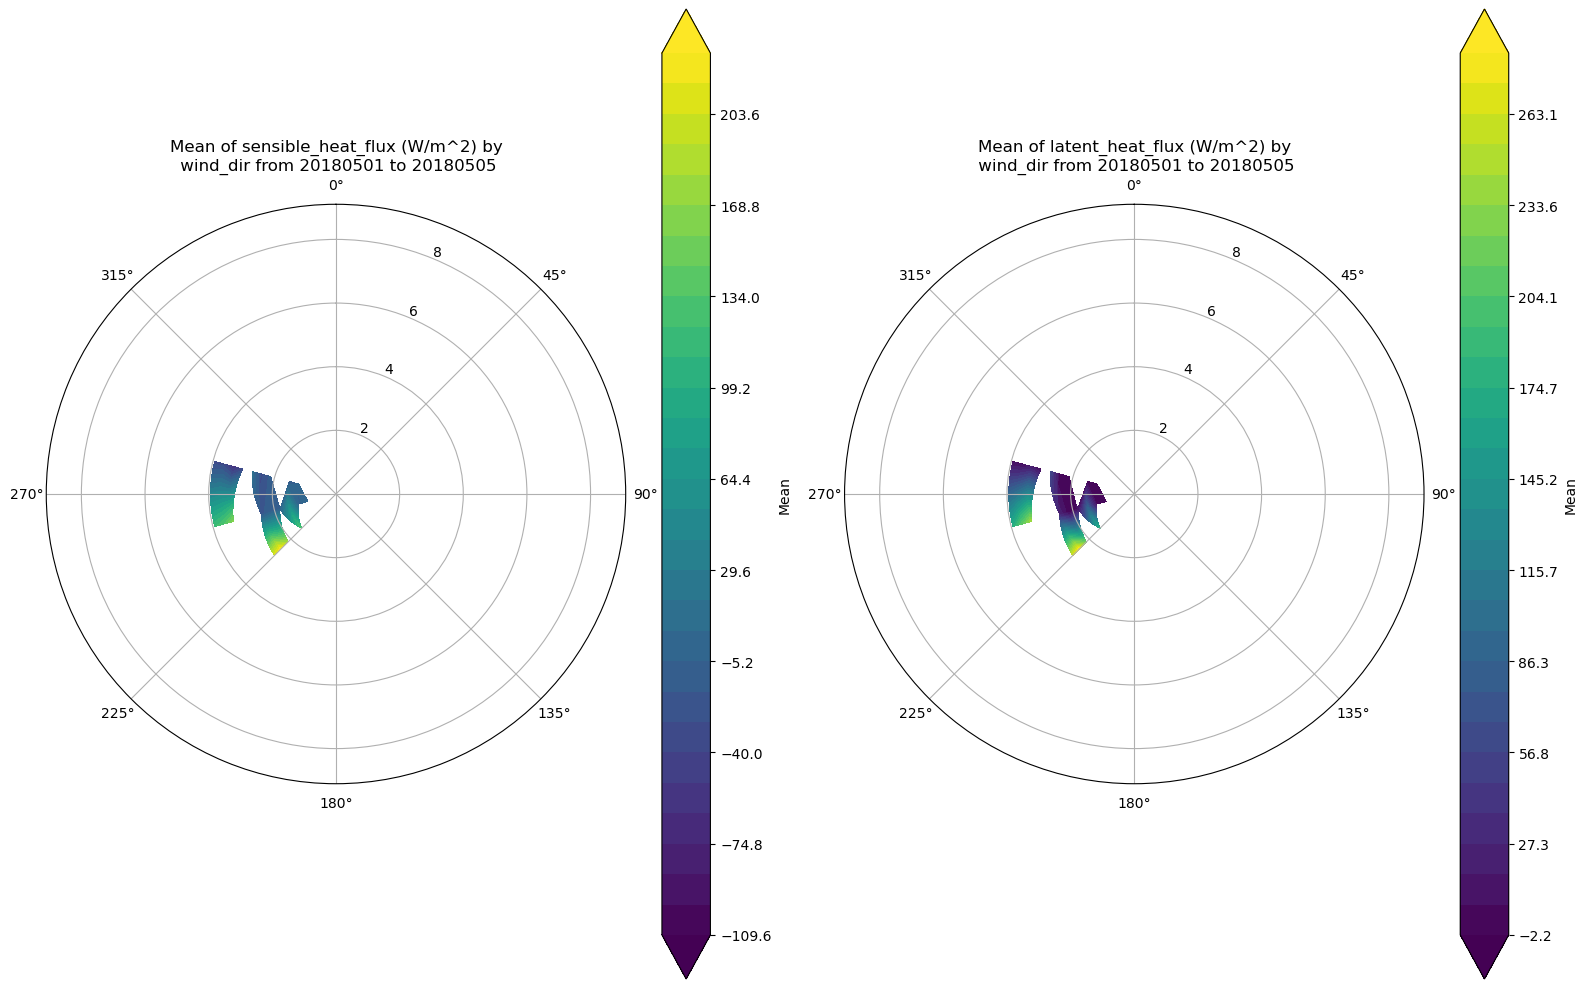

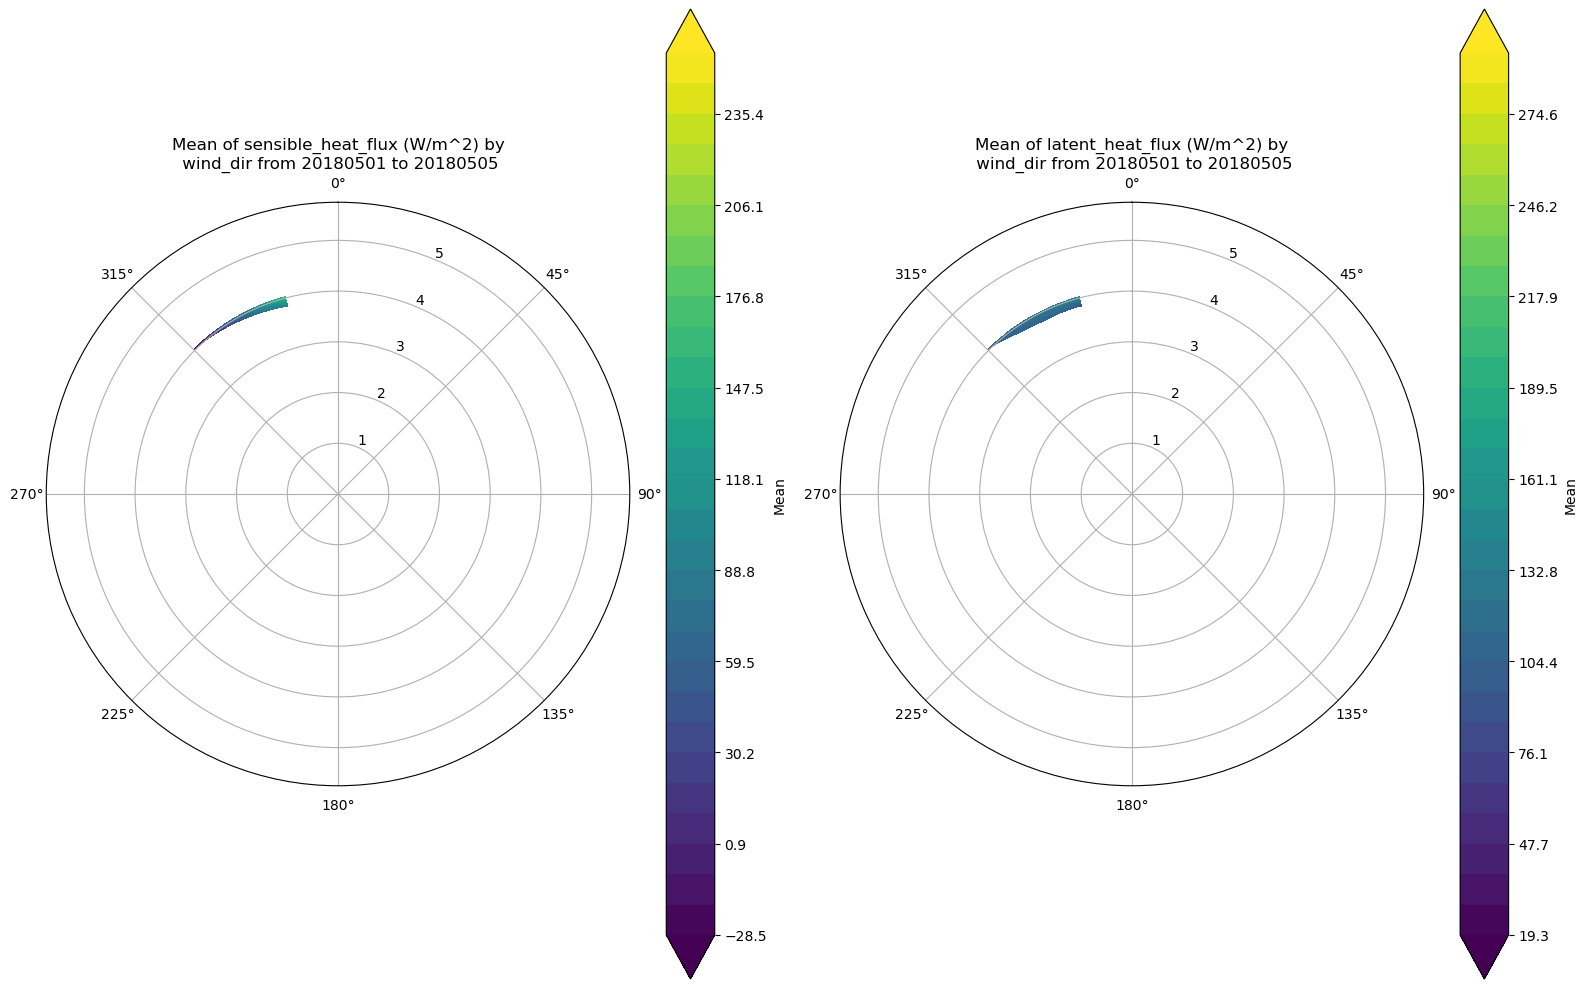

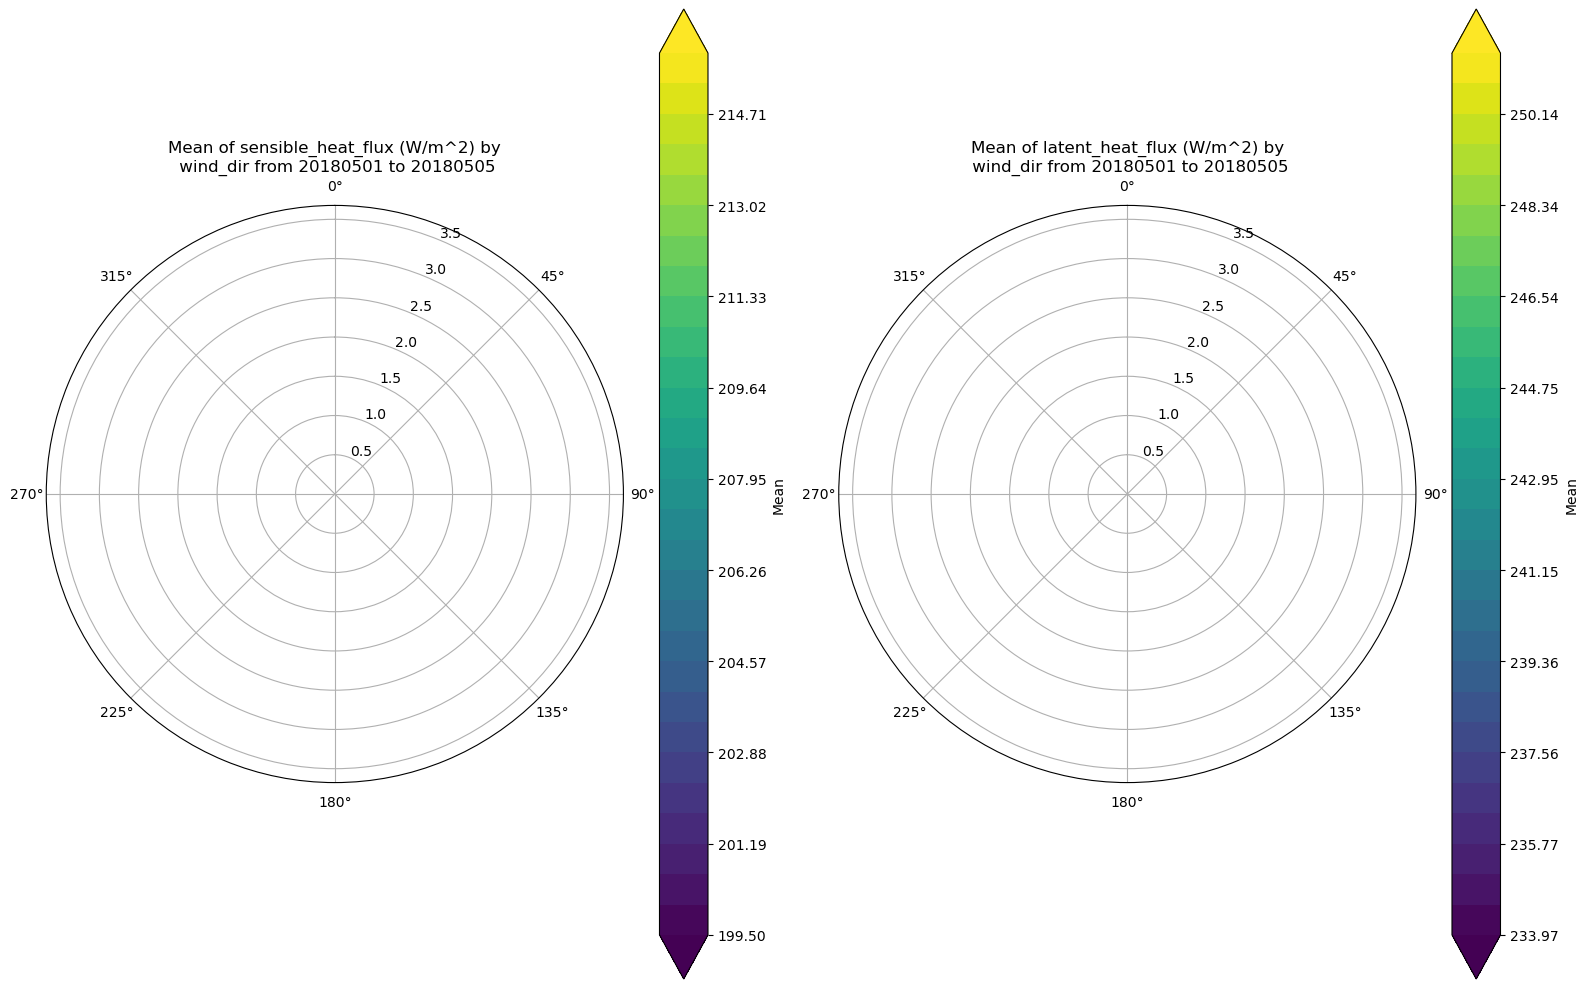

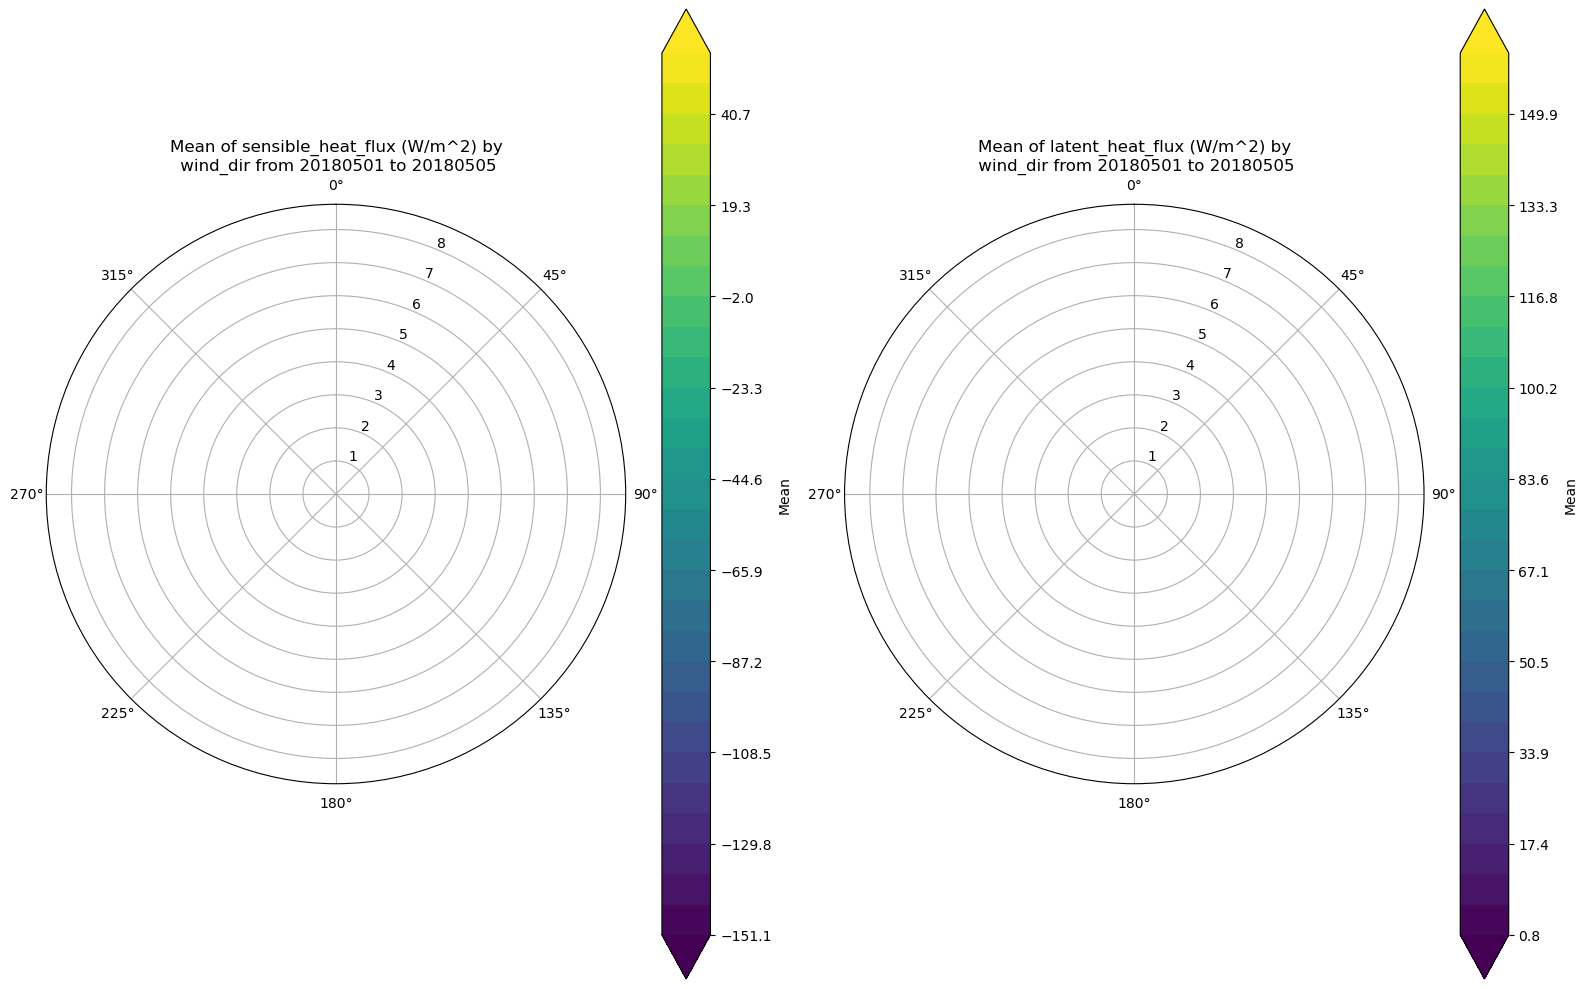

In [17]:
#Polar Coordinate Graphs
for x in range(0, len(list)):   
    ds1 = ds.where(ds.crop_type == f'{list[x]}')
    display = act.plotting.WindRoseDisplay({f'{list[x]}': ds1},
                                           subplot_shape=(1,2), figsize=(16,10))
    display.plot_data('wind_dir', 'wind_spd', 'sensible_heat_flux', num_dirs=12, 
                      plot_type='contour', dsname=f'{list[x]}', subplot_index=(0,0), contour_type='mean')
    display.plot_data('wind_dir', 'wind_spd', 'latent_heat_flux', num_dirs=12, 
                      plot_type='contour', dsname=f'{list[x]}', subplot_index=(0,1), contour_type='mean')